Q1

a. Zero Frequency Filtering is a  technique that emphasizes abrupt changes in a signal's baseline by differentiating the signal
and filtering it to highlight rapid transitions or events.
It is commonly used in applications like speech processing to detect and locate significant sound events within an audio signal making it valuable for event detection and feature extraction in various signal processing domains.
It is one of the technique whick is useful for epoch detection as there is significant excitation is present near the epoch location.



b.Time Scale Modification  means speeding up or slowing down a sound without affecting the frequency content, such as the perceived pitch of any tonal components.

Q2

In [1]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
s, fs = sf.read("q2_audio.wav")
x=s
fs

22050

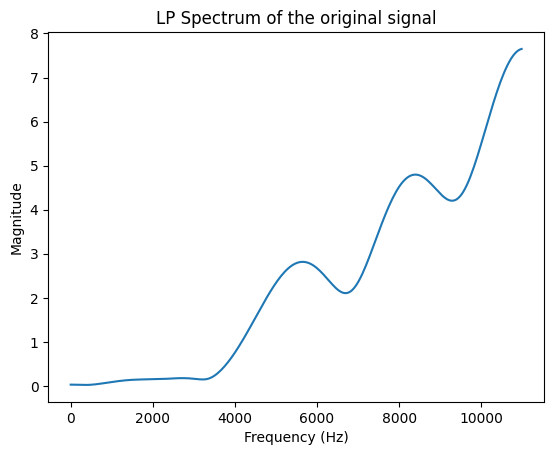

In [2]:
##Q2_a
# LPC order
order = 10

lp_coefficients = librosa.lpc(x, order=order)
lp_spectrum = np.fft.fft(lp_coefficients, 512)
freq = np.fft.fftfreq(512, 1 / fs)

plt.plot(freq[:256], np.abs(lp_spectrum[:256]))

plt.title("LP Spectrum of the original signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("LP Spectrum of the original signal")
plt.show()







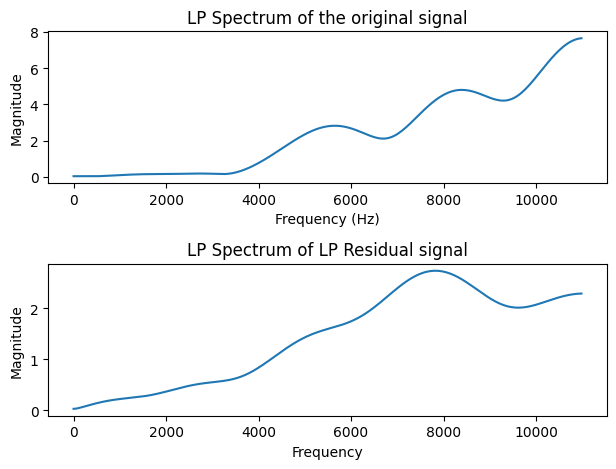

In [3]:

lp_coefficients = librosa.lpc(x, order=order)

plt.subplot(2,1,1)
plt.plot(freq[:256], np.abs(lp_spectrum[:256]))

plt.title("LP Spectrum of the original signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("LP Spectrum of the original signal")

# Calculate the LP residual signal
error_signal = x - np.convolve(lp_coefficients, x, mode='same')
lp_error= librosa.lpc(np.abs(error_signal), order=order)
lp_spectrum2 = np.fft.fft(lp_error, 512)

plt.subplot(2,1,2)
plt.plot(freq[:256], np.abs(lp_spectrum2[:256]))
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("LP Spectrum of LP Residual signal")

plt.tight_layout()
plt.show()



observation:
    the magnitude plot of the LP spectrum of the signal is high when it is compared to the maginitude spectrum of the LP spctrum of the
    lp residule of the signal. And also the former is able to capture the fundamental frequency better than the second one.


    For pitch analysis the first one is preferred but in noisy condition it is not robust. So for the cases like high pitch audio or silence part or noisy audio the second will perform better than the previous one.  
    The reason for the same may be the residual often contains information related to excitation sources and non-periodic components of the audio.

Q3

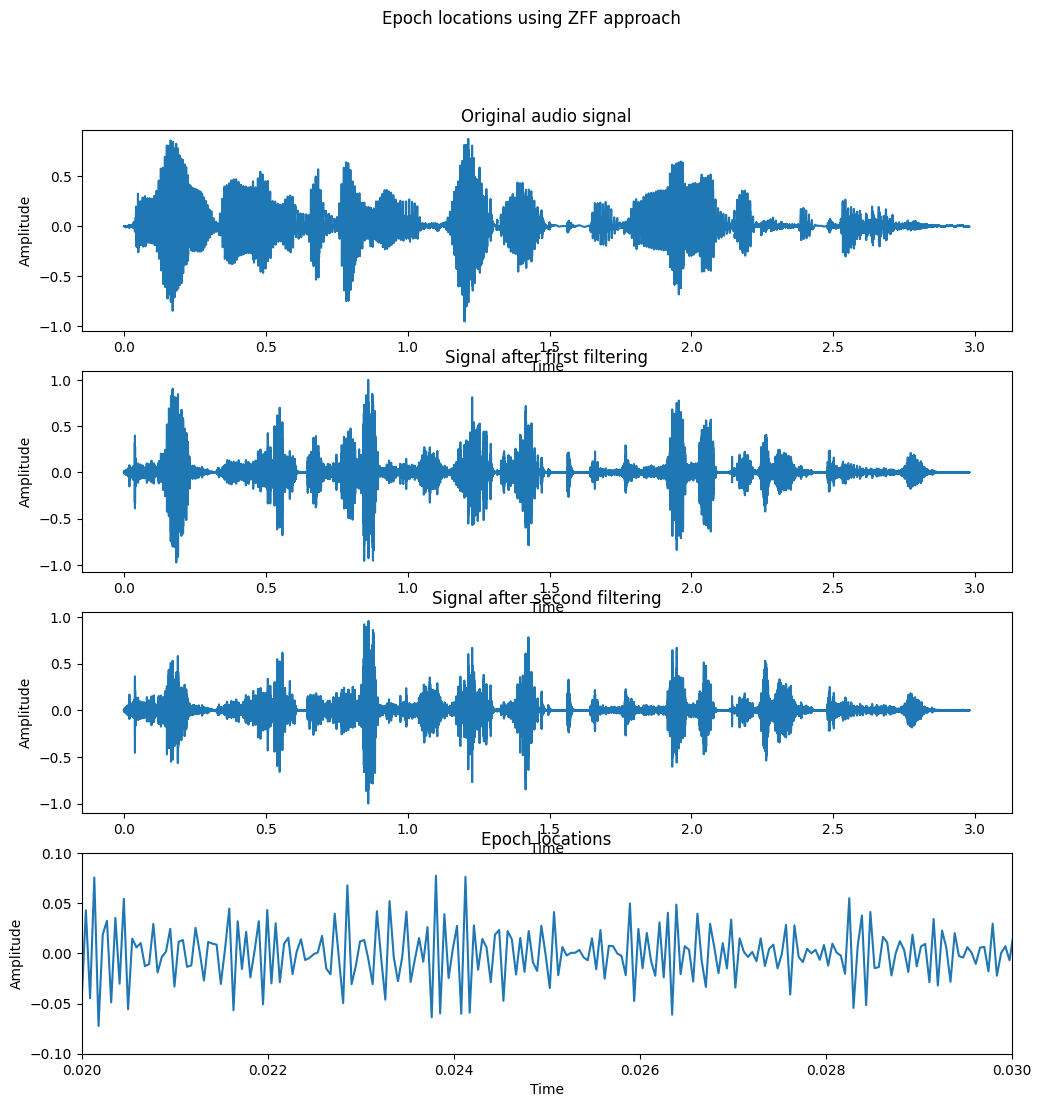

In [7]:


# Compute time values
time = np.arange(0, len(s)) / fs

# Plot the original audio signal
plt.figure(figsize=(12, 12))
plt.subplot(411)
plt.plot(time, s)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Original audio signal")

# Computing x[n]
n = len(s)
x = np.zeros(n)

for k in range(1, n):
    x[k] = s[k] - s[k - 1]

b = 1
a = [1, -2, 1]

y1 = np.convolve(x, b, mode='full')
y1 = np.convolve(y1, a, mode='full')
y1 = y1 / np.max(np.abs(y1))
time = np.arange(0, len(y1)) / fs

plt.subplot(412)
plt.plot(time, y1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Signal after first filtering")

y2 = np.convolve(y1, b, mode='full')
y2 = np.convolve(y2, a, mode='full')
y2 = y2 / np.max(np.abs(y2))
time = np.arange(0, len(y2)) / fs

plt.subplot(413)
plt.plot(time, y2)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Signal after second filtering")

# Removing trend
#  sf is 22050 so in each 10 miliseconds there will be 220 samples so N=220
N = 220
err = np.sum(y2[:2 * N + 1])
y = np.zeros(n)

for k in range(220, n):
    if k +220 > n-1:
        y[k] = y[k - 1]
    else:
        y[k] = y2[k] - (err / 441)
        err = err - y2[k - 219] + y2[k + 220]

# Mean subtraction
err = np.sum(y[:2 * N + 1])
output = np.zeros(n)

for k in range(220, n):
    if k + 220 > n-1:
        output[k] = output[k - 1]
    else:
        output[k] = y[k] - (err / 441)
        err = err - y[k - 219] + y[k + 220]

      

output = output / np.max(np.abs(output))
time = np.arange(0, len(output)) / fs

plt.subplot(414)
plt.plot(time, output)
plt.xlim(0.02,0.03)
plt.ylim(-0.1,0.1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Epoch locations")

plt.suptitle("Epoch locations using ZFF approach")
plt.show()


Q4

In [5]:

import numpy as np
import soundfile as sf
from pydub import AudioSegment
import parselmouth

# Function to calculate prosody features
def calculate_prosody_features(audio_file):
    audio = AudioSegment.from_file(audio_file)
    s, fs = sf.read("q2_audio.wav")
    
    # duration
    syllable_duration = len(audio) / 1000.0  # 
    duaraion = len(audio) / 1000.0  # 
    
    # root mean square energy
    sound_intensity = np.sqrt(np.mean(np.array(audio.get_array_of_samples())**2))
    
    # fundamental frequency
    sound = parselmouth.Sound(audio_file)
    pitch = sound.to_pitch()
    F0 = np.nanmean(pitch.selected_array['frequency'])
    # zero crossing rate
    samples = np.array(audio.get_array_of_samples())
    Zce = np.sum(np.abs(np.diff(np.sign(s)))) / (2 * len(s))
    
    #Zce
    zce = np.mean(samples[1:] * samples[:-1] < 0)
    
    #magnitude spectrum
    magnitude_spectrum = np.mean(np.abs(np.fft.fft(samples)))
    
    return syllable_duration, sound_intensity, F0, Zce, zce, magnitude_spectrum



In [6]:
# Define two audio files
audio_file1 = "telgu.wav"
audio_file2 = "kannada.wav"
audio_file3 = "hindi.wav"
audio_file4 = "odia.wav"

# Calculate prosody features for both speakers
duration1, intensity1, F01, Zce1, zce1, mag_spec1 = calculate_prosody_features(audio_file1)
duration2, intensity2, F02, Zce2, zce2, mag_spec2 = calculate_prosody_features(audio_file2)
duration3, intensity3, F03, Zce3, zce3, mag_spec3 = calculate_prosody_features(audio_file3)
duration4, intensity4, F04, Zce4, zce4, mag_spec4 = calculate_prosody_features(audio_file4)

# Print the prosody features for both speakers
print("Prosody Features ")
print(f" Duration: {duration1:.4f} seconds")
print(f"Duration: {duration2:.4f} seconds")
print(f"Duration: {duration3:.4f} seconds")
print(f" Duration: {duration4:.4f} seconds")
print()
print(f"intensity: {intensity1:.4f}")
print(f"intensity: {intensity2:.4f}")
print(f"intensity: {intensity3:.4f}")
print(f"intensity: {intensity4:.4f}")
print()
print(f"(F0): {F01:.4f} Hz")
print(f"(F0): {F02:.4f}Hz")
print(f"(F0): {F03:.4f} Hz")
print(f"(F0): {F04:.4f} Hz")
print()
print(f"Zero Crossing Rate: {Zce1:.4f}")
print(f"Zero Crossing Rate: {Zce2:.4f}")
print(f"Zero Crossing Rate: {Zce3:.4f}")
print(f"Zero Crossing Rate: {Zce4:.4f}")
print()
print(f"Zce: {zce1:.4f}")
print(f"Zce: {zce2:.4f}")
print(f"Zce: {zce3:.4f}")
print(f"Zce: {zce4:.4f}")
print()
print(f"maginitude spectrum: {mag_spec1:.4f}")
print(f"maginitude spectrum: {mag_spec2:.4f}")
print(f"maginitude spectrum: {mag_spec3:.4f}")
print(f"maginitude spectrum: {mag_spec4:.4f}")


Prosody Features 
 Duration: 1.9850 seconds
Duration: 2.0090 seconds
Duration: 2.1130 seconds
 Duration: 2.4500 seconds

intensity: 21.6665
intensity: 22.0522
intensity: 21.6804
intensity: 23.5644

(F0): 109.4220 Hz
(F0): 114.9535Hz
(F0): 155.2167 Hz
(F0): 133.3190 Hz

Zero Crossing Rate: 0.0610
Zero Crossing Rate: 0.0610
Zero Crossing Rate: 0.0610
Zero Crossing Rate: 0.0610

Zce: 0.4992
Zce: 0.4993
Zce: 0.4986
Zce: 0.4983

maginitude spectrum: 521659.5015
maginitude spectrum: 550731.0133
maginitude spectrum: 879418.5759
maginitude spectrum: 570853.7096


observation:

siginificant difference is observed in hindi speaker and other speakers for the feature maginitude spectrum and fundamental frequency.

odia speaker is speaking slowly  and telgu is speaking faster.